In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [4]:
df_train=pd.read_csv('train.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df_train=df_train.drop(columns=['dual_sim','touch_screen','blue','fc','four_g','talk_time','three_g','wifi','sc_h','sc_w','m_dep','mobile_wt','int_memory'])
X=np.array(df_train.drop(['price_range'],1))
Y=np.array(df_train['price_range'])

C:\Users\Bhavesh Kumar B\AppData\Local\Temp\ipykernel_21040\2549508501.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(df_train.drop(['price_range'],1))


<AxesSubplot:>

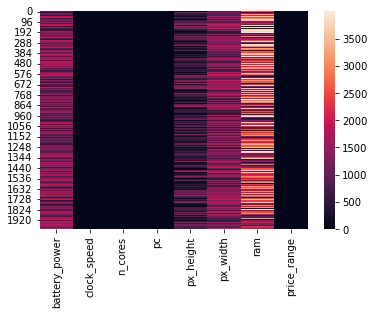

In [8]:
sns.heatmap(df_train)

In [9]:
X

array([[8.420e+02, 2.200e+00, 2.000e+00, ..., 2.000e+01, 7.560e+02,
        2.549e+03],
       [1.021e+03, 5.000e-01, 3.000e+00, ..., 9.050e+02, 1.988e+03,
        2.631e+03],
       [5.630e+02, 5.000e-01, 5.000e+00, ..., 1.263e+03, 1.716e+03,
        2.603e+03],
       ...,
       [1.911e+03, 9.000e-01, 8.000e+00, ..., 8.680e+02, 1.632e+03,
        3.057e+03],
       [1.512e+03, 9.000e-01, 5.000e+00, ..., 3.360e+02, 6.700e+02,
        8.690e+02],
       [5.100e+02, 2.000e+00, 6.000e+00, ..., 4.830e+02, 7.540e+02,
        3.919e+03]])

In [10]:
df_train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [11]:
target=pd.get_dummies(df_train['price_range'])
Y=np.array(target)
Y

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [12]:
n_train = math.floor(0.7 * X.shape[0])
n_test = math.ceil((1-0.7) * X.shape[0])
X_train = X[:n_train].T
Y_train = Y[:n_train].T
X_test = X[n_train:].T
Y_test = Y[n_train:].T
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

Total Number of rows in train: 7
Total Number of rows in test: 7
shape of X_train : (7, 1400)
shape of Y_train : (4, 1400)
shape of X_test : (7, 600)
shape of Y_test : (4, 600)


In [13]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [14]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float64)

In [15]:
def initialize_parameters(n_inp, n_hid, n_out):
    w1 = np.random.randn(n_hid, n_inp)*0.001
    b1 = np.zeros((n_hid, 1))
    
    w2 = np.random.randn(n_out, n_hid)*0.001
    b2 = np.zeros((n_out, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [16]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    
    return forward_cache

In [17]:
def cost_function(a2, y):   
    
    m=y.shape[0]
    cost = -(1/m)*np.sum(y*np.log(a2))

    return cost

In [18]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

In [19]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

In [20]:
def model(x, y, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    print(n_y)
    cost_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
        
    return parameters, cost_list

In [21]:
iterations = 5000
n_hid = 20
learning_rate = 0.001
Parameters, Cost_list = model(X_train, Y_train, n_h = n_hid, learning_rate = learning_rate, iterations = iterations)

4
Cost after 0 iterations is : 485.3724465510879
Cost after 500 iterations is : 434.18334546007054
Cost after 1000 iterations is : 403.68930153210863
Cost after 1500 iterations is : 381.341871553076
Cost after 2000 iterations is : 367.8735035770127
Cost after 2500 iterations is : 359.3844950872182
Cost after 3000 iterations is : 356.1378838626775
Cost after 3500 iterations is : 354.91128175162885
Cost after 4000 iterations is : 352.85739828316713
Cost after 4500 iterations is : 352.4560401134135


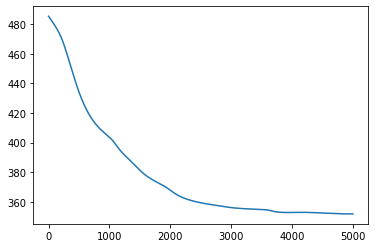

In [22]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [23]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']  
    
    a_out = np.argmax(a_out, 0)  
    
    labels = np.argmax(labels, 0)

    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [24]:
print("Accuracy : ", (accuracy(X_test, Y_test, Parameters)), "%")

Accuracy :  50.16666666666667 %
